In [61]:
import pandas as pd
import numpy as np

import os
import pandas as pd
import numpy as np
import sys
from time import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten
from keras.callbacks import TensorBoard
from keras.optimizers import RMSprop
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils

import matplotlib.pyplot as plt
import itertools
from keras.regularizers import L1L2

import numpy as np
import pandas as pd
np.random.seed(10)

from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adagrad
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn import manifold
import keras.layers.normalization as bn

from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from sklearn.preprocessing import normalize  
from sklearn.preprocessing import normalize  
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from keras import regularizers

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras import backend as K
K.set_image_dim_ordering('tf')

%matplotlib inline

In [87]:
df = pd.read_csv("/home/rkarim/program_and_data/data/fullDF.csv", sep='\t')

In [96]:
print(df.iloc[:,0])

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
9044    32
9045    32
9046    32
9047    32
9048    32
9049    32
9050    32
9051    32
9052    32
9053    32
9054    32
9055    32
9056    32
9057    32
9058    32
9059    32
9060    32
9061    32
9062    32
9063    32
9064    32
9065    32
9066    32
9067    32
9068    32
9069    32
9070    32
9071    32
9072    32
9073    32
Name: Label, Length: 9074, dtype: int64


In [92]:
print(df['Label'].value_counts())

2     981
30    507
14    507
16    502
9     487
28    480
22    479
17    464
1     398
26    383
25    363
11    352
15    348
5     341
3     272
12    271
24    229
19    176
7     169
21    161
20    152
27    144
8     124
29    119
23    118
13    115
18     82
32     80
0      76
10     65
31     56
6      37
4      36
Name: Label, dtype: int64


In [93]:
print(df.shape)

(9074, 20501)


In [46]:
def prepareData(): 
    df = pd.read_csv("/home/rkarim/program_and_data/data/fullDF.csv", sep='\t')
    
    #df = df.drop(df.columns[[0]], axis=1)

    column_headers = df.columns.values.tolist()
    column_headers.remove('Label')
    
    features = df[column_headers].values
    labels = df['Label'].values   

    normalizedFeatures = normalize(features.reshape(features.shape[0],-1), norm='max', axis=0).reshape(features.shape)
   
  
    print(type(normalizedFeatures))
    print(type(labels))

    #features = binary[cols]
    #labels = binary['ctype']

    features = np.array(normalizedFeatures)
    labels = np.array(labels)

    print(features.shape)
    print(labels.shape)

    features, labels = shuffle(features, labels, random_state = 0)  # shuffle the data
    print("Shauffle completed!")
    
    return features, labels

In [47]:
features, labels = prepareData()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(9074, 20500)
(9074,)
Shauffle completed!


In [48]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [49]:
labels = one_hot_encode(labels)

In [50]:
def prepare_test_train_valid(features, labels):
    train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.25, random_state=42)
    
    print('X_train shape:', train_x.shape)
    print('Y_train shape:', train_y.shape)
    
    train_x = np.reshape(train_x,(train_x.shape[0], 1, train_x.shape[1]))
    test_x = np.reshape(test_x,(test_x.shape[0], 1, test_x.shape[1]))
    
    return train_x, test_x, train_y, test_y

In [51]:
train_x, test_x, train_y, test_y = prepare_test_train_valid(features, labels)

X_train shape: (6805, 20500)
Y_train shape: (6805, 33)


In [52]:
def model_build_LSTM(num_classes, timesteps, data_dim, reg): #OK
    # expected input data shape: (batch_size, timesteps, data_dim)
    model = Sequential()
    model.add(LSTM(512, return_sequences=True, input_shape=(timesteps, data_dim), recurrent_regularizer= reg)) 
    model.add(Dropout(0.70))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.50))
    
    # apply softmax to output
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    sgd = Adagrad(lr=0.01, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
    
    return model

In [75]:
def model_build_CNN(n_outputs, n_timesteps, n_features):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=4, activation='relu', padding="same", input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=4, padding="same", activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [54]:
def model_train_LSTM(model, number_epoch):   
    tensorboardRNN = TensorBoard(log_dir="RNN_logs/{}".format(time()))    
    history = model.fit(train_x, train_y, validation_split=0.1, callbacks=[tensorboardRNN], batch_size=32, epochs=int(number_epoch), shuffle=False)      
    
    print(model.summary())

    return model, history

In [79]:
def model_train_CNN(model, epochs, batch_size, verbose):
    tensorboardCNN = TensorBoard(log_dir="CNN_logs/{}".format(time()))
    history = model.fit(train_x, train_y, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    print(model.summary())
    
    return model, history

In [56]:
def plotLoses(history, number_opoch): 
    # visualizing losses and accuracy 
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    train_acc  = history.history['acc']
    val_acc    = history.history['val_acc']
    xc         = range(number_opoch)
   
    plt.plot(xc, train_loss, 'r--', label='Traing loss per epoch', linewidth=1.0)
    plt.title('Training and validation loss per epoch')
    #plt.xlabel('Epoch')
    #plt.ylabel('Traing loss')
    #plt.legend(loc='upper right')
    #plt.grid(True)
    
    plt.plot(xc, val_loss, 'c--', label='Validation loss per epoch', linewidth=1.0)
    #plt.title('Validation loss per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    #plt.grid(True)
    plt.show()
    
    plt.plot(xc, train_acc, 'r--', label='Training accuracy per epoch', linewidth=1.0)
    plt.title('Training vs validation accuracy per epoch')
    #plt.xlabel('Epoch')
    #plt.ylabel('Traing loss')
    #plt.legend(loc='upper right')
    #plt.grid(True)
    
    plt.plot(xc, val_acc, 'c--', label='Validation accuracy per epoch', linewidth=1.0)
    #plt.title('Validation loss per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    #plt.grid(True)

In [57]:
def model_evaluate(model):            
    y_prob = model.predict(test_x) 
    #rnn_model.reset_states()  
    
    y_pred = y_prob.argmax(axis=-1)
    y_true = np.argmax(test_y, 1)

    # evaluate the model
    score, accuracy = model.evaluate(test_x, test_y, batch_size=32)
    
    print("Accuracy = {:.2f}".format(accuracy))
    print("Score = {:.2f}".format(score))

Train on 6124 samples, validate on 681 samples
Epoch 1/200
6124/6124 [==============================] - 16s 3ms/step - loss: 3.2821 - acc: 0.1045 - val_loss: 3.0458 - val_acc: 0.2173
Epoch 2/200
6124/6124 [==============================] - 13s 2ms/step - loss: 2.9788 - acc: 0.1844 - val_loss: 2.6819 - val_acc: 0.3010
Epoch 3/200
6124/6124 [==============================] - 13s 2ms/step - loss: 2.7344 - acc: 0.2391 - val_loss: 2.4794 - val_acc: 0.3245
Epoch 4/200
6124/6124 [==============================] - 13s 2ms/step - loss: 2.5347 - acc: 0.2876 - val_loss: 2.3014 - val_acc: 0.3451
Epoch 5/200
6124/6124 [==============================] - 13s 2ms/step - loss: 2.4176 - acc: 0.3124 - val_loss: 2.2244 - val_acc: 0.3847
Epoch 6/200
6124/6124 [==============================] - 13s 2ms/step - loss: 2.3178 - acc: 0.3253 - val_loss: 2.1436 - val_acc: 0.4038
Epoch 7/200
6124/6124 [==============================] - 13s 2ms/step - loss: 2.2020 - acc: 0.3494 - val_loss: 2.0889 - val_acc: 0.3891
E

6124/6124 [==============================] - 13s 2ms/step - loss: 0.3185 - acc: 0.8927 - val_loss: 3.8431 - val_acc: 0.3847
Epoch 61/200
6124/6124 [==============================] - 13s 2ms/step - loss: 0.2293 - acc: 0.9283 - val_loss: 4.0891 - val_acc: 0.3877
Epoch 62/200
6124/6124 [==============================] - 13s 2ms/step - loss: 0.2573 - acc: 0.9143 - val_loss: 4.2078 - val_acc: 0.3803
Epoch 63/200
6124/6124 [==============================] - 13s 2ms/step - loss: 0.2134 - acc: 0.9317 - val_loss: 4.0061 - val_acc: 0.4068
Epoch 64/200
6124/6124 [==============================] - 13s 2ms/step - loss: 0.2403 - acc: 0.9216 - val_loss: 4.3721 - val_acc: 0.3833
Epoch 65/200
6124/6124 [==============================] - 14s 2ms/step - loss: 0.2400 - acc: 0.9221 - val_loss: 4.0625 - val_acc: 0.3979
Epoch 66/200
6124/6124 [==============================] - 14s 2ms/step - loss: 0.2173 - acc: 0.9319 - val_loss: 4.3714 - val_acc: 0.3774
Epoch 67/200
6124/6124 [==============================

6124/6124 [==============================] - 8s 1ms/step - loss: 0.2094 - acc: 0.9311 - val_loss: 5.4528 - val_acc: 0.3862
Epoch 121/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.2686 - acc: 0.9179 - val_loss: 5.0303 - val_acc: 0.3818
Epoch 122/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.1389 - acc: 0.9541 - val_loss: 5.3708 - val_acc: 0.3803
Epoch 123/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.1125 - acc: 0.9616 - val_loss: 5.4788 - val_acc: 0.3715
Epoch 124/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.1160 - acc: 0.9579 - val_loss: 5.6282 - val_acc: 0.3627
Epoch 125/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.1195 - acc: 0.9610 - val_loss: 5.4421 - val_acc: 0.3642
Epoch 126/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.0935 - acc: 0.9701 - val_loss: 5.7293 - val_acc: 0.3568
Epoch 127/200
6124/6124 [==============================

Epoch 180/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.0592 - acc: 0.9793 - val_loss: 6.0709 - val_acc: 0.3686
Epoch 181/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.0704 - acc: 0.9765 - val_loss: 6.1522 - val_acc: 0.3847
Epoch 182/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.1819 - acc: 0.9417 - val_loss: 6.0045 - val_acc: 0.3656
Epoch 183/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.1744 - acc: 0.9451 - val_loss: 5.6250 - val_acc: 0.3847
Epoch 184/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.0554 - acc: 0.9843 - val_loss: 5.9346 - val_acc: 0.3686
Epoch 185/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.0708 - acc: 0.9762 - val_loss: 6.2638 - val_acc: 0.3803
Epoch 186/200
6124/6124 [==============================] - 8s 1ms/step - loss: 0.0901 - acc: 0.9686 - val_loss: 5.9604 - val_acc: 0.3730
Epoch 187/200
6124/6124 [================

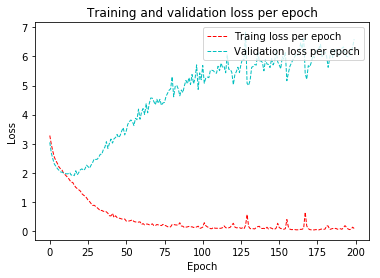

2269/2269 [==============================] - 2s 1ms/step
Accuracy = 0.34
Score = 6.86


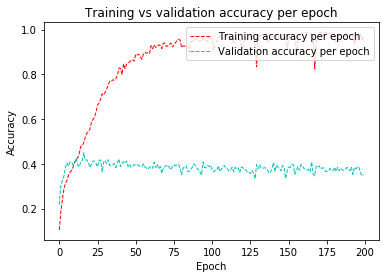

In [86]:
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
verbose, epochs, batch_size = 1, 200, 128

cnnModel = model_build_CNN(n_outputs, n_timesteps, n_features)
trainedCNNModel, history = model_train_CNN(cnnModel, epochs, batch_size,verbose) 

# timesteps = 1
# data_dim = 20500
#reg = L1L2(l1=0.10, l2=0.10)
#rnnModel = model_build_LSTM(n_outputs, timesteps, data_dim, reg)
#history, trainedRNNModel = model_train_CNN(rnnModel) 

plotLoses(history, epochs)
model_evaluate(trainedCNNModel) 

In [39]:
def cancerClassifier(number_epoch, reg):

    data_dim = 20500
    print(data_dim)

    timesteps = 1
    num_classes = train_y.shape[1]
    print(num_classes)

    model = model_build(num_classes, timesteps, data_dim, reg)

    trainedModel, history1 = model_train(model, number_epoch, train_x, train_y)
    plotLoses(history1, number_epoch)
    model_evaluate(trainedModel) 
    

20500
33
Train on 6124 samples, validate on 681 samples
Epoch 1/100
6124/6124 [==============================] - 55s 9ms/step - loss: 93.1665 - acc: 0.0901 - val_loss: 32.4220 - val_acc: 0.1175
Epoch 2/100
6124/6124 [==============================] - 53s 9ms/step - loss: 19.1696 - acc: 0.0993 - val_loss: 9.7001 - val_acc: 0.1175
Epoch 3/100
6124/6124 [==============================] - 53s 9ms/step - loss: 8.7167 - acc: 0.1009 - val_loss: 7.4999 - val_acc: 0.1175
Epoch 4/100
6124/6124 [==============================] - 53s 9ms/step - loss: 7.2734 - acc: 0.1032 - val_loss: 6.7757 - val_acc: 0.1175
Epoch 5/100
6124/6124 [==============================] - 53s 9ms/step - loss: 6.7657 - acc: 0.1037 - val_loss: 6.4024 - val_acc: 0.1175
Epoch 6/100
6124/6124 [==============================] - 53s 9ms/step - loss: 6.4213 - acc: 0.1052 - val_loss: 6.1123 - val_acc: 0.1175
Epoch 7/100
6124/6124 [==============================] - 53s 9ms/step - loss: 6.1529 - acc: 0.1048 - val_loss: 5.8780 - val_a

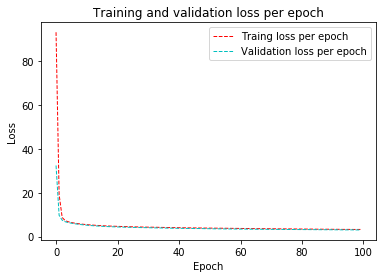

2269/2269 [==============================] - 3s 1ms/step
Accuracy = 0.30
Score = 3.17


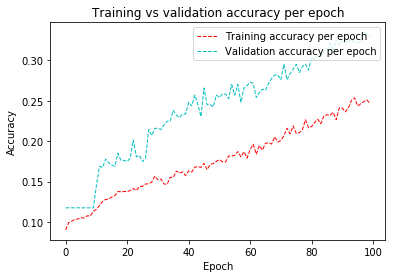

In [44]:
reg = L1L2(l1=0.10, l2=0.10)
cancerClassifier(100, reg)